<a href="https://colab.research.google.com/github/Benvi0h/Machine_Learning_projects_Vikas/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer detection using KNN

data[group]
 [[1, 2], [2, 3], [3, 1]]
data[group]
 [[6, 5], [7, 7], [8, 6]]
r


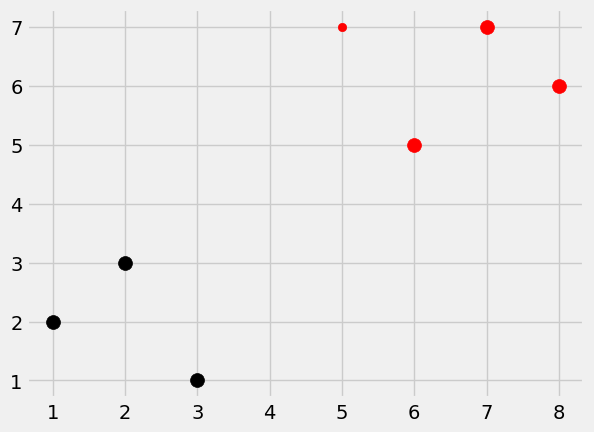

In [ ]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter

style.use('fivethirtyeight')

dataset = {'k':[[1,2],[2,3],[3,1]] , 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7] 

# [[plt.scatter(ii[0],ii[1],s=100, color=i)for ii in dataset[i]]for i in dataset]
# plt.scatter(new_features[0],new_features[1])
# plt.show()

def k_nearest_neighbours(data,predict,k=3):
    if len(data) >=k:
         warnings.warn('K is set to a value less than the total voting groups !')
    
    distances = []
    for group in data:
        print("data[group]\n",data[group])
        for features in data[group]:
#             print(data[group])
#            euclidian_distance = np.linalg.norm(np.array(features) - np.array(predict))
            euclidian_distance = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([euclidian_distance,group])
#             print("\n",distances)
    
    votes = [i[1] for i in sorted(distances)[:k]]
#     print("Counter(votes).most_common(1)\n",Counter(votes).most_common(1)[0][0])
    vote_result = Counter(votes).most_common(1)[0][0]
    
    return vote_result

result = k_nearest_neighbours(dataset , new_features ,k=3)
print(result)

[[plt.scatter(ii[0],ii[1],s=100, color=i)for ii in dataset[i]]for i in dataset]
plt.scatter(new_features[0],new_features[1],color = result)
plt.show()

In [ ]:
kaggle datasets download -d uciml/breast-cancer-wisconsin-data

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
import numpy as np
from math import sqrt
import warnings
from collections import Counter
import pandas as pd
import random

def k_nearest_neighbours(data,predict,k=3):
    if len(data) >=k:
         warnings.warn('K is set to a value less than the total voting groups !')
    
    distances = []
    for group in data:
#         print("data[group]\n",data[group])
        for features in data[group]:
            euclidian_distance = np.linalg.norm(np.array(features) - np.array(predict))
            distances.append([euclidian_distance,group])
    
    votes = [i[1] for i in sorted(distances)[:k]]
#     print( Counter(votes).most_common(1))
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence =  Counter(votes).most_common(1)[0][1]
    
    return vote_result


df = pd.read_csv('breast-cancer-wisconsin.csv')
df.replace('?', -99999 , inplace=True)
df.drop(['id'] , 1 , inplace =True)
# df.head

full_data = df.astype(float).values.tolist()
# print(full_data[:5])

random.shuffle(full_data)
test_size = 0.2
train_set = {2:[] , 4:[]}
test_set = {2:[] , 4:[]}
print(train_set)
print(test_set)

train_data = full_data[:-int(test_size * len(full_data))]
test_data = full_data[-int(test_size * len(full_data)):]
print(train_data[:2])
print(test_data[:2])


for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
    test_set[i[-1]].append(i[:-1])

correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        
        vote = k_nearest_neighbours(train_set,data,k=5)
        if(group == vote):
            correct +=1
        total += 1
print("Accuracy" , correct/total)
    

FileNotFoundError: ignored